In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [76]:
df = pd.read_csv("../Dataset/Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Dataset Description
The dataset contains information about restaurants such as location,
services offered, cost, and customer feedback.  
The objective of this task is to predict the aggregate restaurant rating
using machine learning regression models.


In [77]:
df.shape


(9551, 21)

In [78]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

The dataset consists of multiple numerical and categorical features.
The target variable is **Aggregate rating**, which represents the overall
customer rating of a restaurant.


In [80]:
df.isnull().sum()


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [81]:
df.dropna(inplace=True)


Missing values were removed to maintain data quality and ensure
reliable model training.


In [82]:
df = df.drop([
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality',
    'Locality Verbose',
    'Rating color',
    'Rating text',
    'Currency'
], axis=1)


Irrelevant textual and identifier columns were removed to reduce noise
and improve model efficiency.


In [83]:
le = LabelEncoder()

categorical_columns = [
    'City',
    'Cuisines',
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Switch to order menu'
]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


Categorical variables were converted into numerical format using
Label Encoding to make them compatible with regression algorithms.


In [84]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']


The dataset was divided into input features (X) and target variable (y).


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


The data was split into training (80%) and testing (20%) sets
to evaluate model performance on unseen data.


In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [87]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


Two regression models were trained to compare performance:
Linear Regression and Decision Tree Regression.


In [88]:
print("Linear Regression Performance")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

print("\nDecision Tree Regression Performance")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Linear Regression Performance
MSE: 1.521791585495533
R2 Score: 0.33547153409525887

Decision Tree Regression Performance
MSE: 0.17800419067574644
R2 Score: 0.9222700053793168


Decision Tree Regression achieved better performance compared to
Linear Regression, indicating non-linear relationships between
features and restaurant ratings.


In [89]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
11,Votes,0.947125
2,Longitude,0.016606
3,Latitude,0.012217
4,Cuisines,0.010063
5,Average Cost for two,0.006057
0,Country Code,0.003433
1,City,0.002089
7,Has Online delivery,0.000862
10,Price range,0.000858
6,Has Table booking,0.000681


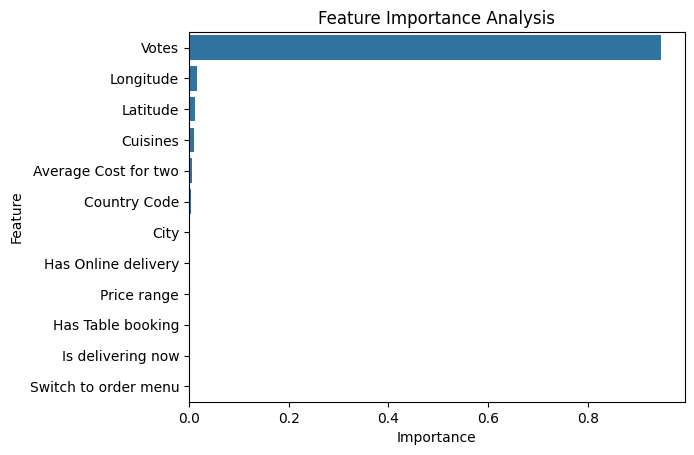

In [90]:
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance Analysis")
plt.show()


### Feature Importance Analysis

The feature importance results show that the number of votes has the
highest impact on predicting restaurant ratings. This indicates that
customer engagement plays a crucial role in determining aggregate ratings.

Other features such as location, cost, and service availability contribute
less to the prediction once the effect of votes is considered. This behavior
is expected in Decision Tree models, which prioritize features that most
effectively reduce prediction error.


While votes dominate the model predictions, including other features
helps capture secondary patterns and ensures better generalization
across different restaurant profiles.


### Conclusion
In this project, machine learning regression models were used to predict
restaurant ratings based on cost, services, and customer feedback.
The Decision Tree Regressor performed best, and feature importance analysis
revealed key factors influencing restaurant ratings.
